In [1]:
import torch
import torch.nn as nn
import torchvision #for datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyper params
input_size = 784 #24x24
hidden_size = 64
num_classes = 10
num_epochs = 2
batch_size = 64
learning_rate = 0.001

# MNIST
train_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                          train=True,
                                         transform=transforms.ToTensor(),
                                         download=True)

test_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                          train=False,
                                         transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size = batch_size,
                                          shuffle=True) 
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size = batch_size,
                                          shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()
#Shape of sample is tensor of ([batch_size,1(bc one channel images),image size_x,image size_y])
#Shape of label is tensor of ([batch_size x 1])
print(samples.shape,labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


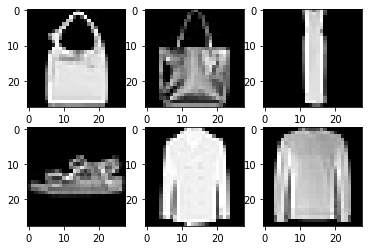

In [2]:
for i in range(6):
  plt.subplot(2,3,i+1) 
  plt.imshow(samples[i][0],cmap='gray') #cmap is color map


In [3]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
                                          #num of classes is output size
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,output_size)

  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    # We want to use CELoss so we dont apply softmax here!!!
    return out


In [4]:
model = NeuralNet(input_size,hidden_size,num_classes)
model.to(device)
#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [5]:
from torch.utils.tensorboard import SummaryWriter #for tensor board
writer = SummaryWriter() 

ImportError: TensorBoard logging requires TensorBoard version 1.15 or above

In [6]:
# training loop
n_total_steps = len(train_loader) #equals the number of batches

for epoch in range(num_epochs):
  for i, (images,labels) in enumerate(train_loader): #gives us data and index
    # we have to reshape this samples of images 
    # to be 16, 784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)
    writer.add_scalar("Loss/train", loss, epoch)#for tensorboard

    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if(i+1)% 100 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

writer.flush()#for tensorboard
writer.close()

#testing not validating
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images,labels in test_loader:
      images = images.reshape(-1, 28*28).to(device)
      labels = labels.to(device)
      outputs = model(images)

      # _ is class label
      _, predictions = torch.max(outputs,1) #returns value and index and we are interested in index or predictions
      n_samples +=labels.shape[0]#nuber of samples in that batch
      n_correct += (predictions == labels).sum().item()
  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy = {acc}')

NameError: name 'writer' is not defined